## Problem3

In [37]:
#import packages
import pandas as pd
from scipy.stats import norm
import numpy as np
from scipy import stats
from sklearn.utils import resample#resample package

### 3(a)

In [3]:
#read excel file
#I copy the source sheet to another excel file cause the source sheet name is 1211.HK and cannot be read
hk0388=pd.read_excel("./0388.HK.xlsx",sheet_name="Sheet1")

In [82]:
#get log-return series into a list named "log_return_list"
return_list=np.array(hk0388.iloc[:,-2].tolist())
return_list=return_list[~np.isnan(return_list)]
#print(len(log_return_list))
#get size of random sample 
total_sample_num=len(return_list)
num_less=np.sum(return_list<-0.02)
num_less

419

### 3(b)(i)

In [5]:
log_return_list=np.array(hk0388.iloc[:,-1].tolist())
log_return_list=log_return_list[~np.isnan(log_return_list)]
total_sample_num=len(log_return_list)
#first calculate mu and sample s
mu_sample_log_revenue=hk0388["Log-return"].mean()
s_sample_log_revenue=hk0388["Log-return"].std()*np.sqrt(total_sample_num)/np.sqrt(total_sample_num-1)
#calculate t0.01(n-1)
t_001=-stats.t.ppf(q=0.01,df=total_sample_num-1)
#get 98% confidence interval of mu
lower=mu_sample_log_revenue-t_001*s_sample_log_revenue/np.sqrt(total_sample_num)
upper=mu_sample_log_revenue+t_001*s_sample_log_revenue/np.sqrt(total_sample_num)
print("The 98% confidence interval is:[{},{}]".format(lower,upper))

The 98% confidence interval is:[-0.001563687037844766,0.0014982089630084128]


### 3(b)(ii)

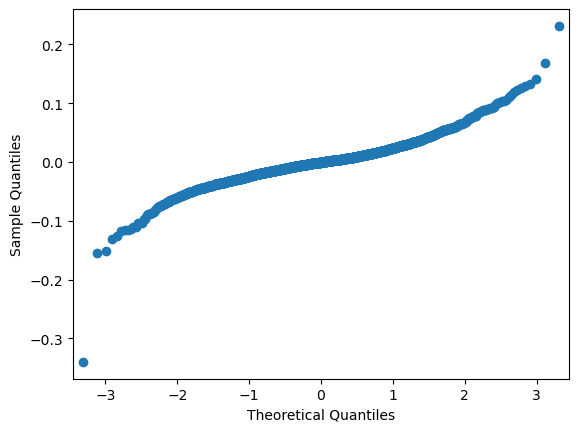

In [70]:
#draw qq plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(np.array(log_return_list))
plt.show()

### 3(b)(iii)

In [78]:
#get log-return series into a list named "log_return_list"
log_return_list=np.array(hk0388.iloc[:,-1].tolist())
log_return_list=log_return_list[~np.isnan(log_return_list)]
print(len(log_return_list))
#get size of random sample 
total_sample_num=len(log_return_list)

#####do bootstrap for n epochs#######
n_epochs=10000#self-define as you like.
mean_list=[]

for i in range(0,n_epochs):
    bootstrap_revenue = resample(log_return_list,replace=1)
    mean=np.mean(bootstrap_revenue)
    mean_list.append(mean)

#sort the mean_list
mean_list.sort()

#get the lower/upper bound
lower_mean=mean_list[int(n_epochs/100)]
upper_mean=mean_list[int(n_epochs*99/100)]
print("The 98% confidence interval of mu is:[{},{}]".format(lower_mean,upper_mean))

2213
The 98% confidence interval of mu is:[-0.0015660071663422105,0.0015121447518431366]


## Problem4

### 4(a)(i)

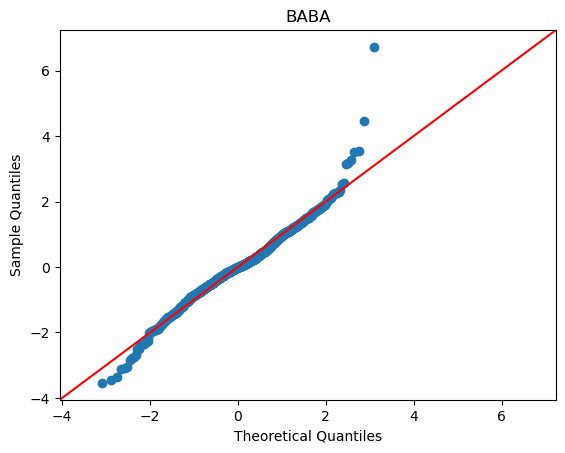

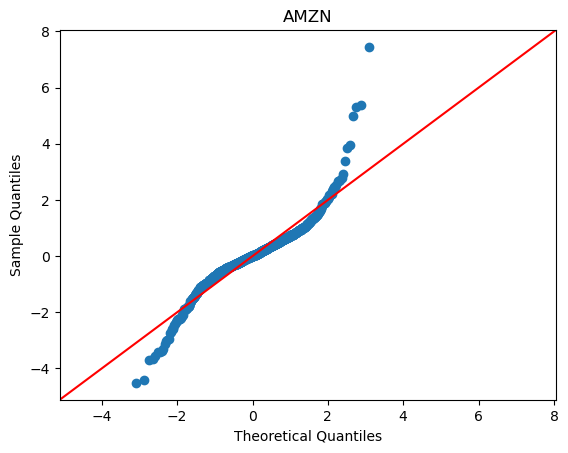

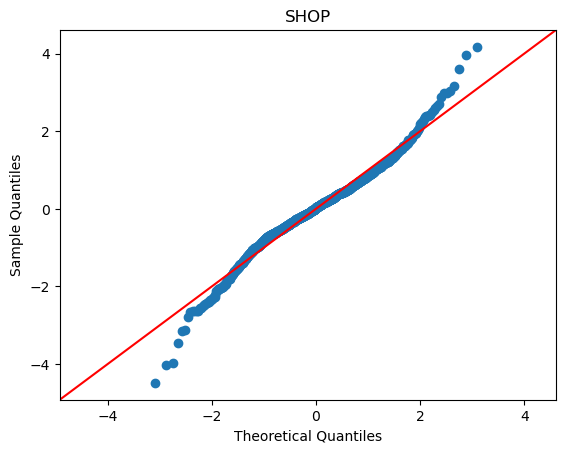

In [75]:
data1=pd.read_excel(r"./MAFS5140_HW1_Data1.xlsx")
baba_revenue=np.array(data1["BABA"].tolist())
baba_revenue=baba_revenue[~np.isnan(baba_revenue)]
baba_revenue=(baba_revenue-np.mean(baba_revenue))/np.std(baba_revenue,ddof=1)
amzn_revenue=np.array(data1["AMZN"].tolist())
amzn_revenue=amzn_revenue[~np.isnan(amzn_revenue)]
amzn_revenue=(amzn_revenue-np.mean(amzn_revenue))/np.std(amzn_revenue,ddof=1)
shop_revenue=np.array(data1["SHOP"].tolist())
shop_revenue=shop_revenue[~np.isnan(shop_revenue)]
shop_revenue=(shop_revenue-np.mean(shop_revenue))/np.std(shop_revenue,ddof=1)
fig = sm.qqplot(np.array(baba_revenue),line="45")
plt.title("BABA")
plt.show()
fig = sm.qqplot(np.array(amzn_revenue),line="45")
plt.title("AMZN")
plt.show()
fig = sm.qqplot(np.array(shop_revenue),line="45")
plt.title("SHOP")
plt.show()

### 4(a)(ii)

In [76]:
#KS-test
n_sample=len(baba_revenue)
baba_mean=data1["BABA"].mean()
amzn_mean=data1["AMZN"].mean()
shop_mean=data1["SHOP"].mean()
baba_s=data1["BABA"].std(ddof=1)
amzn_s=data1["AMZN"].std(ddof=1)
shop_s=data1["SHOP"].std(ddof=1)
D,pvalue=stats.kstest(baba_revenue, 'norm', (baba_mean, baba_s))[0:2]
print("The D and pvalue of BABA KS-test is:{},{}".format(D,pvalue))
D,pvalue=stats.kstest(amzn_revenue, 'norm', (amzn_mean, amzn_s))[0:2]
print("The D and pvalue of AMZN KS-test is:{},{}".format(D,pvalue))
D,pvalue=stats.kstest(shop_revenue, 'norm', (shop_mean, shop_s))[0:2]
print("The D and pvalue of SHOP KS-test is:{},{}".format(D,pvalue))
#Anderson-Darling Test
print("AD-test of BABA",stats.anderson(baba_revenue, dist='norm'))
print("AD-test of AMZN",stats.anderson(amzn_revenue, dist='norm'))
print("AD-test of SHOP",stats.anderson(shop_revenue, dist='norm'))

The D and pvalue of BABA KS-test is:0.4711930994295171,4.864014872504363e-205
The D and pvalue of AMZN KS-test is:0.46741816197439434,1.4034886389546529e-201
The D and pvalue of SHOP KS-test is:0.4721886495377722,5.86919226902114e-206
AD-test of BABA AndersonResult(statistic=3.968267242451816, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-1.9462076925699956e-17, scale=0.9999999999999999)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AD-test of AMZN AndersonResult(statistic=18.522185607425627, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-2.3000636366736312e-17, scale=0.9999999999999999)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AD-test of SHOP AndersonResult(statistic=5.938232851349198, crit

### 4(b) This part use R due to some disadvantages of Python packages.